## Determine which is the peak time for fire occurance

### Importing necessary libraries and function

In [1]:
from dataset_loader_function import load_cleaned_dataset

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = load_cleaned_dataset()

e:\githubProjects\Ahmed_Manzim_Ridwan_APF_Project_WiSe_2024_25\scripts\dataset_loader_function.py:7: DtypeWarning: Columns (12,36,37) have mixed types. Specify dtype option on import or set low_memory=False.
  return pd.read_csv('../dataset/dataset_cleaned.csv')


In [14]:
df_selected = df

# Ensure 'incident_start_date' is in datetime format
df_selected['incident_start_date'] = pd.to_datetime(df_selected['incident_start_date'], errors='coerce')

# Extract year & month, handling NaN values
df_selected['year'] = df_selected['incident_start_date'].dt.year
df_selected = df_selected.dropna(subset=['year'])  # Remove NaN years
df_selected['year'] = df_selected['year'].astype(int)  # Convert to integer

df_selected['month'] = df_selected['incident_start_date'].dt.strftime('%b')  # 'Jan', 'Feb', etc.

# Aggregate fire count per year & month
fires_per_month_year = df_selected.groupby(['year', 'month'])['incident_number'].count().reset_index()
fires_per_month_year.rename(columns={'incident_number': 'Fire Count'}, inplace=True)

# Order months correctly
month_order = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']

# Set up the figure and axes
unique_years = sorted(fires_per_month_year['year'].unique())  # Get available years

C:\Users\manzi\AppData\Local\Temp\ipykernel_22540\845518674.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_selected['year'] = df_selected['year'].astype(int)  # Convert to integer
C:\Users\manzi\AppData\Local\Temp\ipykernel_22540\845518674.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_selected['month'] = df_selected['incident_start_date'].dt.strftime('%b')  # 'Jan', 'Feb', etc.


### graph plot

C:\Users\manzi\AppData\Local\Temp\ipykernel_22540\476371987.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='month', y='Fire Count', data=fires_per_month_year[fires_per_month_year['year'] == year],
C:\Users\manzi\AppData\Local\Temp\ipykernel_22540\476371987.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='month', y='Fire Count', data=fires_per_month_year[fires_per_month_year['year'] == year],
C:\Users\manzi\AppData\Local\Temp\ipykernel_22540\476371987.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='month', y='Fire Count', 

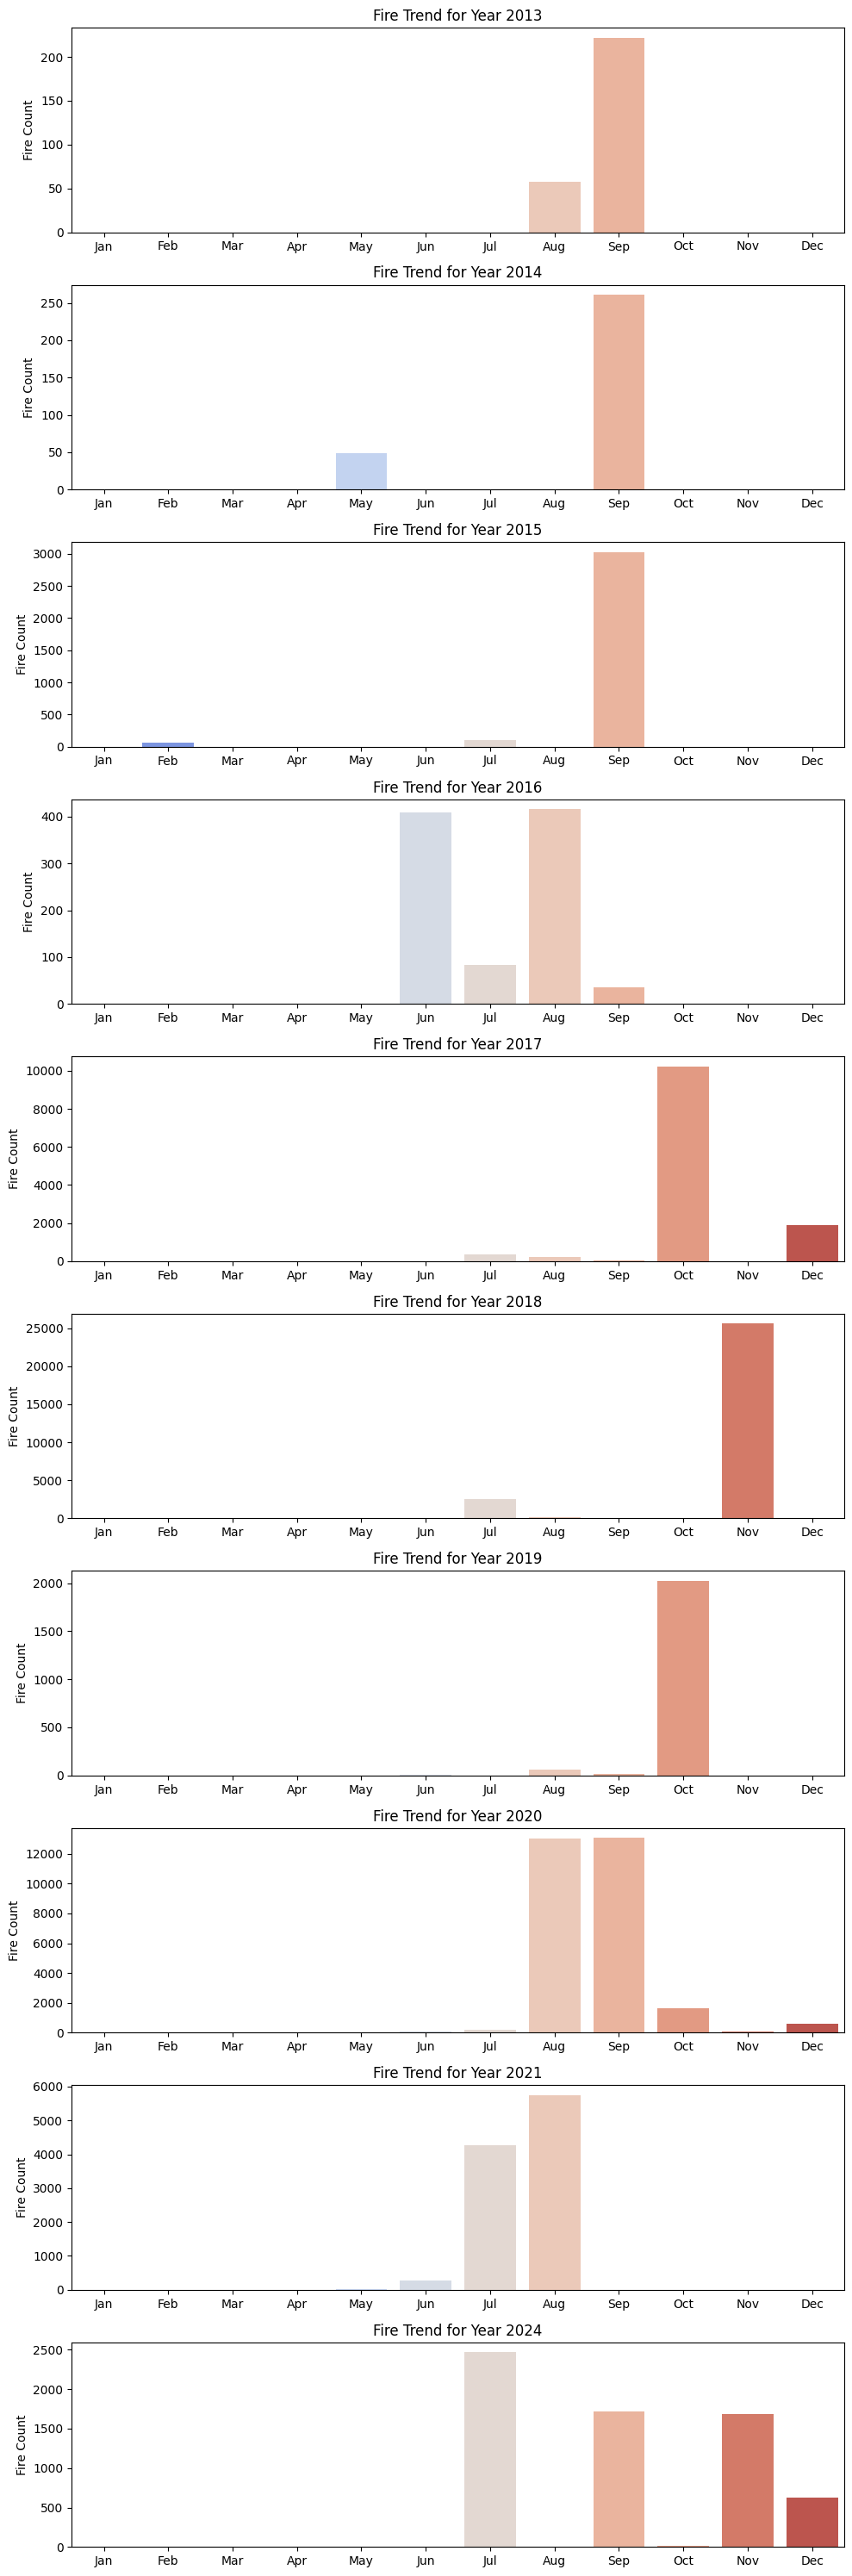

In [17]:
fig, axes = plt.subplots(nrows=num_years, ncols=1, figsize=(10, num_years * 3))  # One row per year

# Create a bar plot for each year
for i, year in enumerate(unique_years):
    ax = axes[i] if num_years > 1 else axes  # Handle case when there's only one year
    sns.barplot(x='month', y='Fire Count', data=fires_per_month_year[fires_per_month_year['year'] == year],
                order=month_order, ax=ax, palette='coolwarm')
    ax.set_title(f'Fire Trend for Year {year}')
    ax.set_xlabel('')
    ax.set_ylabel('Fire Count')

# Adjust layout
plt.tight_layout()
plt.show()

## Findings

### Almost No Fire events in the first half of the year! 

#### Check fire count in a table

In [30]:
# Create a pivot table for year vs. month fire occurrences
fire_pivot = df_selected.pivot_table(
    index='year', 
    columns='month', 
    values='incident_number', 
    aggfunc='count', 
    fill_value=0  # Replace NaN with 0 for better readability
)

# Reorder columns based on month_order, filling missing ones with 0
fire_pivot = fire_pivot.reindex(columns=month_order, fill_value=0)
fire_pivot.loc['Total'] = fire_pivot.sum()

# Display the table
fire_pivot


month,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec
year,,,,,,,,,,,,
2013,0,0,0,0,0,0,0,58,222,0,0,0
2014,0,0,0,0,49,0,0,0,261,0,0,0
2015,0,59,0,0,0,0,105,0,3029,0,0,0
2016,0,0,0,0,0,409,83,416,36,0,0,0
2017,0,0,0,0,0,7,366,225,40,10240,0,1879
2018,0,0,0,0,1,83,2571,104,7,0,25637,0
2019,0,0,0,0,1,6,2,57,16,2026,0,0
2020,0,0,0,0,0,77,171,13010,13083,1646,68,571
2021,0,0,0,0,11,264,4272,5752,0,0,0,0


### General Deduction

- In the first half of the year, the occurance of fire is very rare. 
- July, August, Sepetember are months, where there are sevel evidences of fire in consecutive years for a long time.
- November, 2018 had been a tough month for the people

C:\Users\manzi\AppData\Local\Temp\ipykernel_22540\2379803372.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y=monthly_totals.index, x=monthly_totals.values, palette='Reds_r')


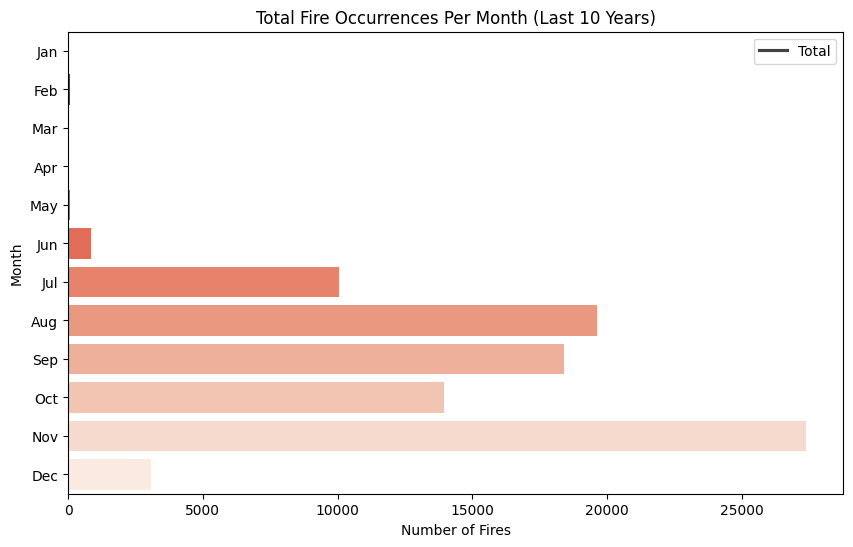

In [29]:
monthly_totals = fire_pivot.loc['Total']

# Plot the data as a bar chart
plt.figure(figsize=(10, 6))
sns.barplot(y=monthly_totals.index, x=monthly_totals.values, palette='Reds_r')

# Set title and labels
plt.title("Total Fire Occurrences Per Month (Last 10 Years)")
plt.xlabel("Number of Fires")
plt.ylabel("Month")
plt.legend(['Total'], loc='best')

# Show the plot
plt.show()
